Importing required libraries

In [155]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import datasets, layers, models
from keras.layers import Dense, Conv2D, Flatten, Input, BatchNormalization,Activation, MaxPooling2D, Dropout
from keras.utils.vis_utils import plot_model
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



In [156]:
# setting random seed for consistent outputs
import os
os.environ['PYTHONHASHSEED']=str(0)
import random
random.seed(21)
np.random.seed(21)
tf.random.set_seed(21)

In [157]:
# loading cifar10 dataset from keras into train and test data

In [158]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() 

In [159]:
# Printing out shapes of data
print('Shape of Train X =', (X_train.shape))
print('Shape of Train y =',  (y_train.shape))
print('Shape of Test X =', (X_test.shape))
print('Shape of Test y =', (y_test.shape))

Shape of Train X = (50000, 32, 32, 3)
Shape of Train y = (50000, 1)
Shape of Test X = (10000, 32, 32, 3)
Shape of Test y = (10000, 1)


In [160]:
# splitting the data as per specifications with training set 20 percent which forms new dataset to work on
X_training_new,X_test_n,Y_training_new,Y_test_n=train_test_split(X_train,y_train,test_size=0.8,random_state=42)

In [161]:
# printing the shape of new training data and data labels

In [162]:
print('Shape of new Training data X =', (X_training_new.shape))
print('Shape of new Training data labels Y =', (Y_training_new.shape))

Shape of new Training data X = (10000, 32, 32, 3)
Shape of new Training data labels Y = (10000, 1)


In [163]:
#nomralizing the new training and test data by dividing them by 255 to convert them to a value between 0 and 1
X_training_new=X_training_new.astype('float32')/255
X_test=X_test.astype('float32')/255

In [164]:
# We perform One hot encoding on the labels which exist as  int values between 0 and 9

In [165]:
Y_training_new=to_categorical(Y_training_new)
y_test=to_categorical(y_test)

## MLP model

In [166]:
# initializing MLP model
mlp = Sequential()
mlp.add(Flatten(input_shape = X_training_new.shape[1:]))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))

In [167]:
mlp.summary()


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_38 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_171 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_172 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_173 (Dense)            (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


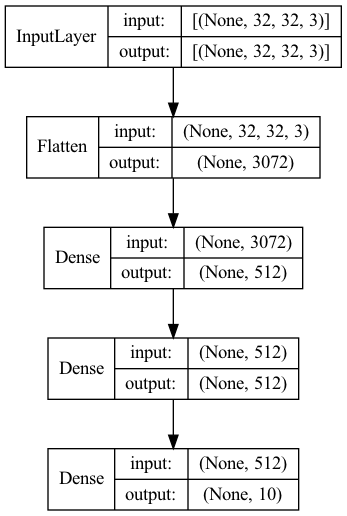

In [168]:
# printing the graphical view of model 
plot_model(mlp, to_file='model.png', show_shapes=True, show_layer_names=False)


In [169]:
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [170]:
mlp_hist = mlp.fit(X_training_new, Y_training_new, validation_data=(X_test, y_test), batch_size=32, epochs=5)

Epoch 1/5
  3/313 [..............................] - ETA: 8s - loss: 2.5745 - accuracy: 0.1059  

2022-07-09 18:13:00.752477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.1771 - accuracy: 0.1928

2022-07-09 18:13:04.311133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 6s 18ms/step - loss: 2.1767 - accuracy: 0.1929 - val_loss: 2.0053 - val_accuracy: 0.2542
Epoch 2/5
313/313 [==============================] - 5s 17ms/step - loss: 1.9405 - accuracy: 0.2836 - val_loss: 1.8989 - val_accuracy: 0.3088
Epoch 3/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8606 - accuracy: 0.3204 - val_loss: 1.8144 - val_accuracy: 0.3466
Epoch 4/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8158 - accuracy: 0.3416 - val_loss: 1.7969 - val_accuracy: 0.3547
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 1.7790 - accuracy: 0.3416 - val_loss: 1.7657 - val_accuracy: 0.3709


In [171]:
# functions to plot the accuracy and loss of models 

In [172]:
def plot_accuracy(model):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(model.history['accuracy'])
    plt.plot(model.history['val_accuracy'])
    plt.title("Accuracy")
    plt.ylabel("Train and validate accuracy")
    plt.xlabel("epoch")
    plt.legend(['train', 'val'])

def plot_loss(model):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title("Loss")
    plt.ylabel("Train and validate loss")
    plt.xlabel("epoch")
    plt.legend(['train', 'val'])
    plt.show()

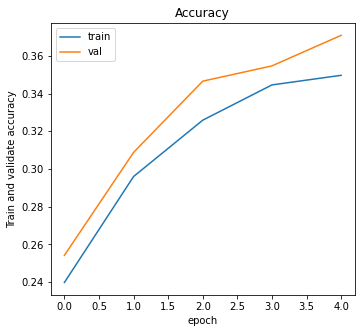

In [173]:
plot_accuracy(mlp_hist)

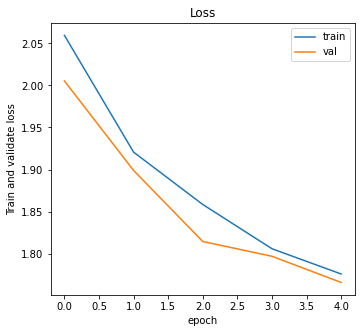

In [174]:
plot_loss(mlp_hist)

# Changing number of layers in MLP model

In [175]:
# initializing list of layers which are to be experimented on
layers_c=[2,3,4,6,7,9]
#layers=[1,3,5,10]

acc=[]
valid_acc=[]

# function to configure and execute the MLP model for different number of layers
def change_layers(l):
    
    mlp=Sequential()
    mlp.add(Flatten(input_shape = X_training_new.shape[1:]))
    
    for m in range(1,l+1):
        mlp.add(Dense(512, activation='sigmoid'))
    mlp.add(Dense(10, activation='softmax'))
    return mlp

for j in layers_c:
    print("-------------for {} hidden layers---------".format(j))
    mlp=change_layers(j)
    mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
    mlp_hist = mlp.fit(X_training_new, Y_training_new, validation_data=(X_test, y_test), batch_size=32, epochs=5)
    acc.append(mlp_hist.history['accuracy'][-1])
    valid_acc.append(mlp_hist.history['val_accuracy'][-1])

-------------for 2 hidden layers---------
Epoch 1/5
  5/313 [..............................] - ETA: 4s - loss: 2.5605 - accuracy: 0.0999  

2022-07-09 18:13:29.354715: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.1937 - accuracy: 0.1850

2022-07-09 18:13:32.790793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 6s 18ms/step - loss: 2.1933 - accuracy: 0.1852 - val_loss: 2.0222 - val_accuracy: 0.2530
Epoch 2/5
313/313 [==============================] - 5s 17ms/step - loss: 1.9383 - accuracy: 0.2831 - val_loss: 1.8847 - val_accuracy: 0.3226
Epoch 3/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8547 - accuracy: 0.3253 - val_loss: 1.8078 - val_accuracy: 0.3466
Epoch 4/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8099 - accuracy: 0.3458 - val_loss: 1.8033 - val_accuracy: 0.3430
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 1.7702 - accuracy: 0.3533 - val_loss: 1.7606 - val_accuracy: 0.3773
-------------for 3 hidden layers---------
Epoch 1/5
  4/313 [..............................] - ETA: 5s - loss: 2.4936 - accuracy: 0.0924  

2022-07-09 18:13:57.336219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.2357 - accuracy: 0.1516

2022-07-09 18:14:01.237092: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 7s 20ms/step - loss: 2.2353 - accuracy: 0.1517 - val_loss: 2.0217 - val_accuracy: 0.2623
Epoch 2/5
313/313 [==============================] - 6s 18ms/step - loss: 1.9803 - accuracy: 0.2612 - val_loss: 1.9570 - val_accuracy: 0.2926
Epoch 3/5
313/313 [==============================] - 6s 18ms/step - loss: 1.9220 - accuracy: 0.2847 - val_loss: 1.8499 - val_accuracy: 0.3194
Epoch 4/5
313/313 [==============================] - 6s 18ms/step - loss: 1.8746 - accuracy: 0.3129 - val_loss: 1.8721 - val_accuracy: 0.3133
Epoch 5/5
313/313 [==============================] - 6s 19ms/step - loss: 1.8384 - accuracy: 0.3172 - val_loss: 1.8155 - val_accuracy: 0.3459
-------------for 4 hidden layers---------
Epoch 1/5
  3/313 [..............................] - ETA: 7s - loss: 2.5116 - accuracy: 0.1024  

2022-07-09 18:14:27.250507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.2895 - accuracy: 0.1296

2022-07-09 18:14:31.666870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 7s 22ms/step - loss: 2.2892 - accuracy: 0.1296 - val_loss: 2.1438 - val_accuracy: 0.1736
Epoch 2/5
313/313 [==============================] - 6s 19ms/step - loss: 2.1044 - accuracy: 0.1788 - val_loss: 2.1336 - val_accuracy: 0.1931
Epoch 3/5
313/313 [==============================] - 7s 21ms/step - loss: 2.0227 - accuracy: 0.2179 - val_loss: 1.9454 - val_accuracy: 0.2526
Epoch 4/5
313/313 [==============================] - 6s 20ms/step - loss: 1.9677 - accuracy: 0.2613 - val_loss: 1.9513 - val_accuracy: 0.2596
Epoch 5/5
313/313 [==============================] - 6s 20ms/step - loss: 1.9224 - accuracy: 0.2692 - val_loss: 1.9195 - val_accuracy: 0.2854
-------------for 6 hidden layers---------
Epoch 1/5
  1/313 [..............................] - ETA: 4:13 - loss: 2.6899 - accuracy: 0.0312

2022-07-09 18:15:00.266507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.3515 - accuracy: 0.1019

2022-07-09 18:15:05.088112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 8s 24ms/step - loss: 2.3512 - accuracy: 0.1020 - val_loss: 2.1557 - val_accuracy: 0.1691
Epoch 2/5
313/313 [==============================] - 7s 22ms/step - loss: 2.1392 - accuracy: 0.1594 - val_loss: 2.1309 - val_accuracy: 0.1613
Epoch 3/5
313/313 [==============================] - 7s 22ms/step - loss: 2.1014 - accuracy: 0.1801 - val_loss: 2.0776 - val_accuracy: 0.1675
Epoch 4/5
313/313 [==============================] - 7s 23ms/step - loss: 2.1037 - accuracy: 0.1766 - val_loss: 2.0678 - val_accuracy: 0.1831
Epoch 5/5
313/313 [==============================] - 7s 23ms/step - loss: 2.0707 - accuracy: 0.1837 - val_loss: 2.0433 - val_accuracy: 0.2022
-------------for 7 hidden layers---------
Epoch 1/5


2022-07-09 18:15:36.870288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.3660 - accuracy: 0.0945

2022-07-09 18:15:42.135275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 9s 25ms/step - loss: 2.3659 - accuracy: 0.0945 - val_loss: 2.3114 - val_accuracy: 0.1000
Epoch 2/5
313/313 [==============================] - 7s 23ms/step - loss: 2.2615 - accuracy: 0.1354 - val_loss: 2.1875 - val_accuracy: 0.1511
Epoch 3/5
313/313 [==============================] - 7s 23ms/step - loss: 2.1286 - accuracy: 0.1691 - val_loss: 2.1221 - val_accuracy: 0.1637
Epoch 4/5
313/313 [==============================] - 8s 24ms/step - loss: 2.1470 - accuracy: 0.1643 - val_loss: 2.1271 - val_accuracy: 0.1784
Epoch 5/5
313/313 [==============================] - 8s 26ms/step - loss: 2.1091 - accuracy: 0.1704 - val_loss: 2.0692 - val_accuracy: 0.1819
-------------for 9 hidden layers---------
Epoch 1/5


2022-07-09 18:16:15.682023: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.3648 - accuracy: 0.0940

2022-07-09 18:16:21.572871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 10s 28ms/step - loss: 2.3648 - accuracy: 0.0940 - val_loss: 2.3274 - val_accuracy: 0.1000
Epoch 2/5
313/313 [==============================] - 8s 26ms/step - loss: 2.3301 - accuracy: 0.1006 - val_loss: 2.3436 - val_accuracy: 0.1000
Epoch 3/5
313/313 [==============================] - 8s 25ms/step - loss: 2.3331 - accuracy: 0.1017 - val_loss: 2.3233 - val_accuracy: 0.1000
Epoch 4/5
313/313 [==============================] - 8s 25ms/step - loss: 2.3386 - accuracy: 0.0930 - val_loss: 2.3283 - val_accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 2.3329 - accuracy: 0.1030 - val_loss: 2.3192 - val_accuracy: 0.1000


In [176]:
# function to plot the train and validation accuracy for different layers

In [177]:
def plot_changing(number,accuracy,val_acc,x_label):
    plt.plot(number,accuracy)
    plt.plot(number,val_acc)
    plt.xlabel(x_label)
    plt.ylabel('train and valid accuracy')
    plt.legend(['Train','Validation'])
    plt.show()

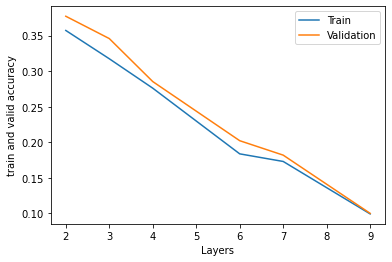

In [178]:
plot_changing(layers_c,acc,valid_acc,'Layers')

# Changing number of neurons in MLP model

In [179]:
# initializing list of number of neurons which are to be experimented on
neurons = [128, 256, 512,1024, 2048]

acc_n=[]
valid_acc_n=[]

# function to configure and execute the MLP model for different number of layers

def change_neurons(neuron):
    mlp = Sequential()
    mlp.add(Flatten(input_shape = X_training_new.shape[1:]))
    mlp.add(Dense(neuron, activation='sigmoid'))
    mlp.add(Dense(neuron, activation='sigmoid'))
    mlp.add(Dense(10, activation='softmax'))
    return mlp

for j in neurons:
    print("-------------for {} neurons---------".format(j))
    mlp=change_neurons(j)
    mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
    mlp_hist = mlp.fit(X_training_new, Y_training_new, validation_data=(X_test, y_test), batch_size=32, epochs=5)
    acc_n.append(mlp_hist.history['accuracy'][-1])
    valid_acc_n.append(mlp_hist.history['val_accuracy'][-1])




-------------for 128 neurons---------
Epoch 1/5
  1/313 [..............................] - ETA: 2:53 - loss: 2.6063 - accuracy: 0.0312

2022-07-09 18:16:56.903717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.2046 - accuracy: 0.1693

2022-07-09 18:17:00.258341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 6s 18ms/step - loss: 2.2043 - accuracy: 0.1694 - val_loss: 2.0125 - val_accuracy: 0.2747
Epoch 2/5
313/313 [==============================] - 5s 17ms/step - loss: 1.9681 - accuracy: 0.2777 - val_loss: 1.9710 - val_accuracy: 0.2941
Epoch 3/5
313/313 [==============================] - 5s 16ms/step - loss: 1.8994 - accuracy: 0.3046 - val_loss: 1.8818 - val_accuracy: 0.3098
Epoch 4/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8616 - accuracy: 0.3311 - val_loss: 1.8500 - val_accuracy: 0.3195
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8236 - accuracy: 0.3429 - val_loss: 1.8203 - val_accuracy: 0.3410
-------------for 256 neurons---------
Epoch 1/5
  5/313 [..............................] - ETA: 4s - loss: 2.4370 - accuracy: 0.1218  

2022-07-09 18:17:24.251723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.1703 - accuracy: 0.1935

2022-07-09 18:17:27.698729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 6s 18ms/step - loss: 2.1699 - accuracy: 0.1937 - val_loss: 1.9824 - val_accuracy: 0.2905
Epoch 2/5
313/313 [==============================] - 5s 17ms/step - loss: 1.9365 - accuracy: 0.2967 - val_loss: 1.9591 - val_accuracy: 0.2936
Epoch 3/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8656 - accuracy: 0.3216 - val_loss: 1.8190 - val_accuracy: 0.3513
Epoch 4/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8248 - accuracy: 0.3420 - val_loss: 1.8358 - val_accuracy: 0.3320
Epoch 5/5
313/313 [==============================] - 5s 17ms/step - loss: 1.7957 - accuracy: 0.3439 - val_loss: 1.7899 - val_accuracy: 0.3589
-------------for 512 neurons---------
Epoch 1/5
  5/313 [..............................] - ETA: 4s - loss: 2.5070 - accuracy: 0.1391  

2022-07-09 18:17:52.109346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.1688 - accuracy: 0.2004

2022-07-09 18:17:55.870517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 7s 20ms/step - loss: 2.1685 - accuracy: 0.2006 - val_loss: 1.9935 - val_accuracy: 0.2642
Epoch 2/5
313/313 [==============================] - 6s 18ms/step - loss: 1.9298 - accuracy: 0.2915 - val_loss: 1.8911 - val_accuracy: 0.3125
Epoch 3/5
313/313 [==============================] - 6s 18ms/step - loss: 1.8503 - accuracy: 0.3286 - val_loss: 1.7896 - val_accuracy: 0.3548
Epoch 4/5
313/313 [==============================] - 6s 18ms/step - loss: 1.8077 - accuracy: 0.3454 - val_loss: 1.7866 - val_accuracy: 0.3472
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 1.7732 - accuracy: 0.3470 - val_loss: 1.7451 - val_accuracy: 0.3737
-------------for 1024 neurons---------
Epoch 1/5
  1/313 [..............................] - ETA: 2:56 - loss: 2.4086 - accuracy: 0.1562

2022-07-09 18:18:21.575309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.2556 - accuracy: 0.1879

2022-07-09 18:18:26.112100: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 7s 22ms/step - loss: 2.2551 - accuracy: 0.1881 - val_loss: 2.0443 - val_accuracy: 0.2492
Epoch 2/5
313/313 [==============================] - 6s 20ms/step - loss: 1.9527 - accuracy: 0.2797 - val_loss: 1.8944 - val_accuracy: 0.3023
Epoch 3/5
313/313 [==============================] - 6s 21ms/step - loss: 1.8719 - accuracy: 0.3188 - val_loss: 1.8385 - val_accuracy: 0.3315
Epoch 4/5
313/313 [==============================] - 6s 20ms/step - loss: 1.8329 - accuracy: 0.3346 - val_loss: 1.7961 - val_accuracy: 0.3529
Epoch 5/5
313/313 [==============================] - 6s 21ms/step - loss: 1.7859 - accuracy: 0.3477 - val_loss: 1.7903 - val_accuracy: 0.3649
-------------for 2048 neurons---------
Epoch 1/5
  4/313 [..............................] - ETA: 6s - loss: 4.5654 - accuracy: 0.1081  

2022-07-09 18:18:55.873912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.5546 - accuracy: 0.1421

2022-07-09 18:19:01.779519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 10s 26ms/step - loss: 2.5537 - accuracy: 0.1422 - val_loss: 2.1118 - val_accuracy: 0.2325
Epoch 2/5
313/313 [==============================] - 8s 25ms/step - loss: 2.0404 - accuracy: 0.2537 - val_loss: 1.9818 - val_accuracy: 0.2608
Epoch 3/5
313/313 [==============================] - 8s 26ms/step - loss: 1.9554 - accuracy: 0.2762 - val_loss: 1.9151 - val_accuracy: 0.3099
Epoch 4/5
313/313 [==============================] - 8s 26ms/step - loss: 1.9026 - accuracy: 0.3046 - val_loss: 1.9048 - val_accuracy: 0.2946
Epoch 5/5
313/313 [==============================] - 9s 28ms/step - loss: 1.8649 - accuracy: 0.3142 - val_loss: 1.8432 - val_accuracy: 0.3400


In [180]:
# printing the validation accuracies of each of the neuron configuration
valid_acc_n

[0.3410000205039978,
 0.3589000105857849,
 0.37370002269744873,
 0.36490002274513245,
 0.3400000035762787]

In [181]:
# plotting the the train and validation accuracy for different number of neurons through plot_changing function

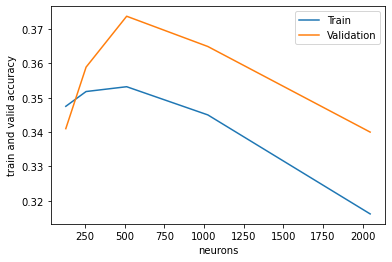

In [182]:
plot_changing(neurons,acc_n,valid_acc_n,"neurons")

# CNN 1

In [183]:
# initializing CNN 1 model as per specifications
cnn1=Sequential()
cnn1.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
cnn1.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(512,activation='sigmoid'))
cnn1.add(layers.Dense(512,activation='sigmoid'))
cnn1.add(layers.Dense(10,activation='softmax'))


In [184]:
cnn1.summary()

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten_50 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_226 (Dense)            (None, 512)               25690624  
_________________________________________________________________
dense_227 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_228 (Dense)            (None, 10)                5130      
Total params: 25,997,130
Trainable params: 25,997,130
Non-trainable params: 0
_________________________________________

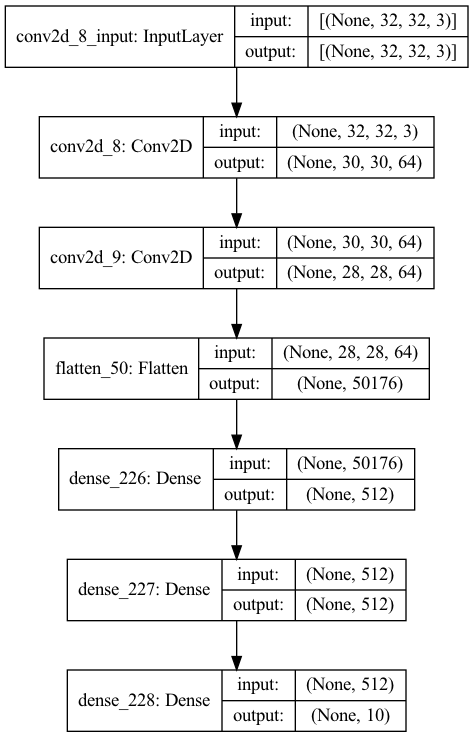

In [185]:
# printing the graphical view of model 

plot_model(cnn1, show_shapes=True, show_layer_names=True)

In [186]:
cnn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [187]:
# fitting the model and calcuating the time to train the model
start_cnn1 = time.time()
cnn1_hist = cnn1.fit(X_training_new, Y_training_new, validation_data=(X_test, y_test), batch_size=32, epochs=5)
time_cnn1 = time.time() - start_cnn1


Epoch 1/5


2022-07-09 18:19:38.316826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 1.9640 - accuracy: 0.2794

2022-07-09 18:19:59.076565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 27s 84ms/step - loss: 1.9633 - accuracy: 0.2797 - val_loss: 1.5623 - val_accuracy: 0.4283
Epoch 2/5
313/313 [==============================] - 26s 82ms/step - loss: 1.3804 - accuracy: 0.4989 - val_loss: 1.3828 - val_accuracy: 0.5016
Epoch 3/5
313/313 [==============================] - 26s 83ms/step - loss: 1.0511 - accuracy: 0.6343 - val_loss: 1.3464 - val_accuracy: 0.5316
Epoch 4/5
313/313 [==============================] - 25s 81ms/step - loss: 0.7108 - accuracy: 0.7541 - val_loss: 1.3833 - val_accuracy: 0.5425
Epoch 5/5
313/313 [==============================] - 25s 79ms/step - loss: 0.3392 - accuracy: 0.9002 - val_loss: 1.6158 - val_accuracy: 0.5317


In [188]:
# printing the trianing time of CNN 1
print('Time duration of CNN1 is : {:.3f}'.format(time_cnn1))


Time duration of CNN1 is : 129.297


In [189]:
# plotting the training and validation accuracy and losses through functions plot_accuracy and plot_loss

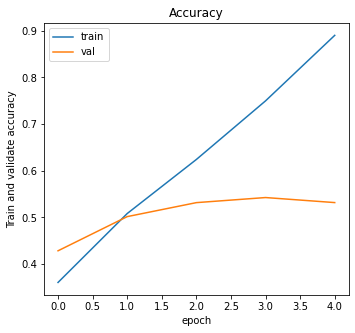

In [190]:
plot_accuracy(cnn1_hist)

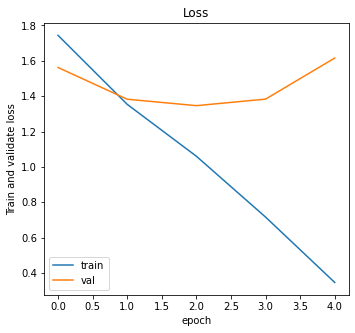

In [191]:
plot_loss(cnn1_hist)

# CNN 2

In [192]:
# initializing CNN 2 model as per specifications

cnn2=Sequential()
cnn2.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
cnn2.add(layers.MaxPooling2D((2, 2)))
cnn2.add(layers.Conv2D(64,(3,3),activation='relu'))
cnn2.add(layers.MaxPooling2D((2, 2)))
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(512,activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(layers.Dense(512,activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(layers.Dense(10,activation='softmax'))

In [193]:
cnn2.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_229 (Dense)            (None, 512)               1180160   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)             

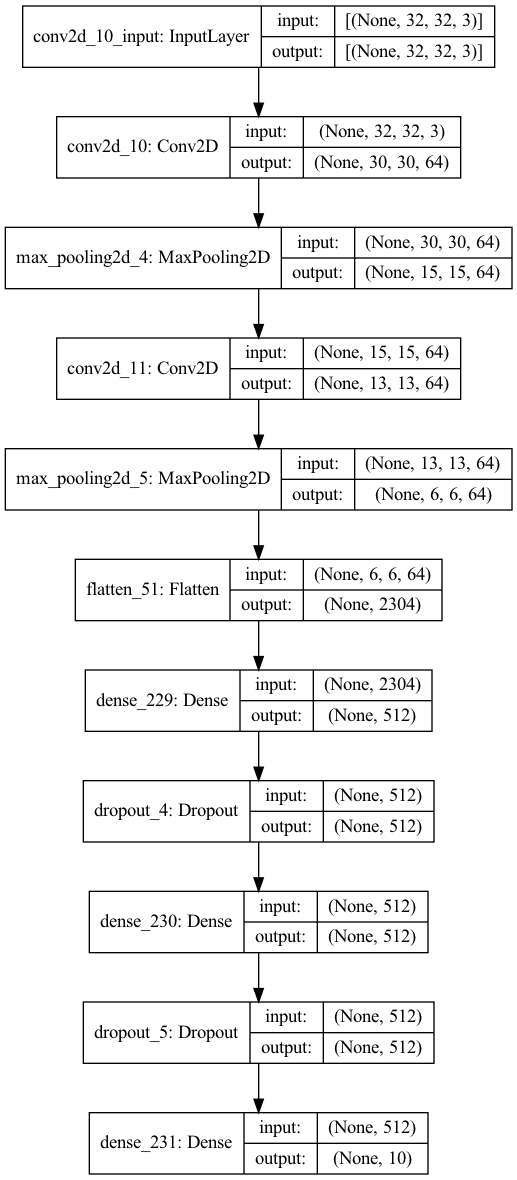

In [194]:
# printing the graphical view of model 

plot_model(cnn2, show_shapes=True, show_layer_names=True)

In [195]:
cnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [196]:
# fitting the model and calcuating the time to train the model
start_cnn2 = time.time()
cnn2_hist = cnn2.fit(X_training_new, Y_training_new, validation_data=(X_test, y_test), batch_size=32, epochs=5)
time_cnn2 = time.time() - start_cnn2

Epoch 1/5


2022-07-09 18:21:48.179853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 2.1985 - accuracy: 0.1863

2022-07-09 18:21:53.966730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 9s 26ms/step - loss: 2.1978 - accuracy: 0.1866 - val_loss: 1.7361 - val_accuracy: 0.3608
Epoch 2/5
313/313 [==============================] - 8s 25ms/step - loss: 1.6471 - accuracy: 0.3934 - val_loss: 1.6029 - val_accuracy: 0.4303
Epoch 3/5
313/313 [==============================] - 8s 27ms/step - loss: 1.4524 - accuracy: 0.4603 - val_loss: 1.5057 - val_accuracy: 0.4495
Epoch 4/5
313/313 [==============================] - 8s 25ms/step - loss: 1.3478 - accuracy: 0.5039 - val_loss: 1.3520 - val_accuracy: 0.5190
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 1.2563 - accuracy: 0.5498 - val_loss: 1.2588 - val_accuracy: 0.5517


In [197]:
# printing the trianing time of CNN 1
print('Time duration of CNN2 is : {:.3f}'.format(time_cnn2))


Time duration of CNN2 is : 40.869


In [198]:
# plotting the training and validation accuracy and losses through functions plot_accuracy and plot_loss

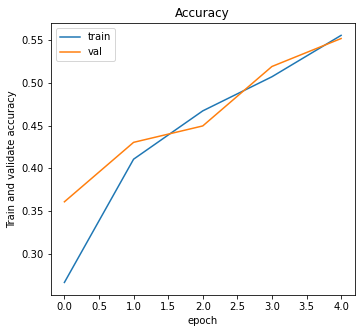

In [199]:
plot_accuracy(cnn2_hist)

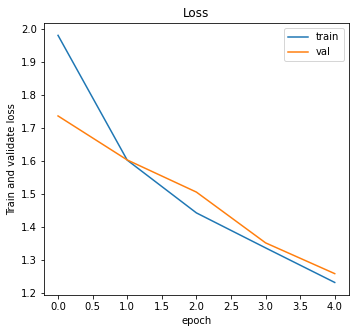

In [200]:
plot_loss(cnn2_hist)

## Training and Validation curves for 2 CNN's

In [201]:
df_compare=pd.DataFrame({
                 'CNN1 accuracy':cnn1_hist.history['accuracy'],
                 'CNN2 accuracy':cnn2_hist.history['accuracy'],
                 'CNN1 Val_accuracy':cnn1_hist.history['val_accuracy'],
                 'CNN2 Val_accuracy':cnn2_hist.history['val_accuracy']
                 })

Text(0, 0.5, 'Accuracy and Validation Accuracy')

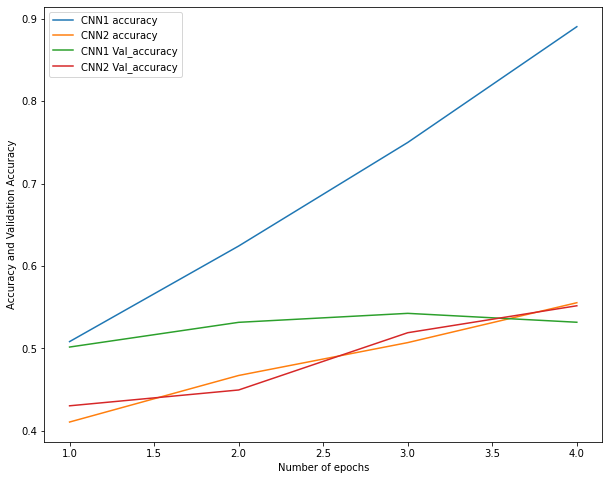

In [202]:
df_compare[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy and Validation Accuracy')

## Accuracy vs epoch for all three models

In [203]:
training_acc = [34.16, 90.02, 54.98]
validation_acc = [37.09, 53.17, 55.17]
models=['MLP', 'CNN1', 'CNN2']
res = {'Models':models, 'Tranining Accuracy':training_acc,'Validation Accuracy': validation_acc}
plot_res = pd.DataFrame(res)
plot_res

,Models,Tranining Accuracy,Validation Accuracy
0,MLP,34.16,37.09
1,CNN1,90.02,53.17
2,CNN2,54.98,55.17


In [204]:
df_acc_plot=pd.DataFrame({
                 'MLP accuracy':mlp_hist.history['accuracy'],\
                 'CNN1 accuracy':cnn1_hist.history['accuracy'],\
                 'CNN2 accuracy':cnn2_hist.history['accuracy']
                 })

Text(0, 0.5, 'Accuracy')

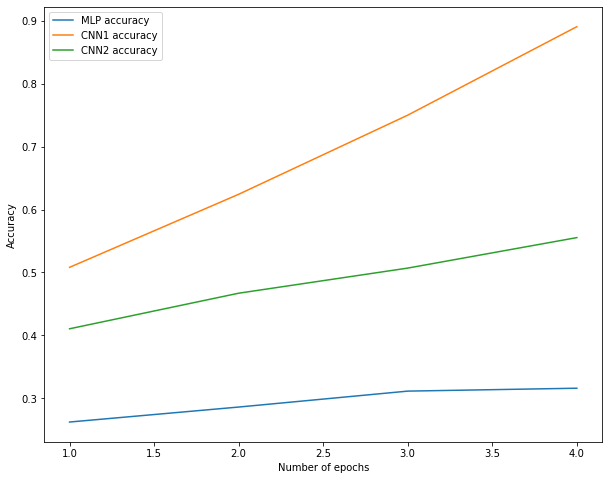

In [205]:
df_acc_plot[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

In [206]:
df_val_plot=pd.DataFrame({
                 'MLP accuracy':mlp_hist.history['val_accuracy'],\
                 'CNN1 accuracy':cnn1_hist.history['val_accuracy'],\
                 'CNN2 accuracy':cnn2_hist.history['val_accuracy']
                 })

Text(0, 0.5, 'Validation Accuracy')

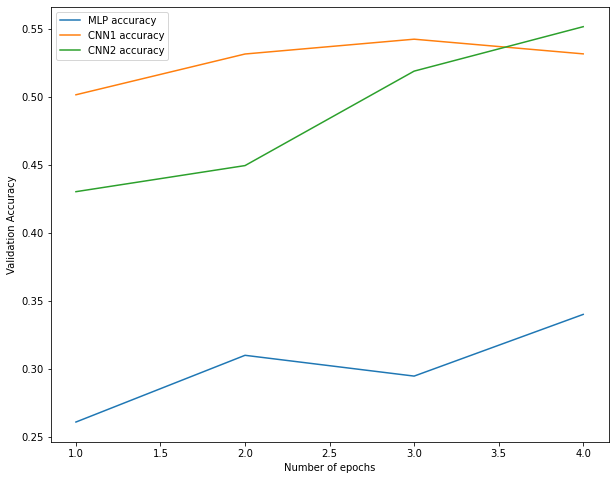

In [207]:
df_val_plot[1:].plot.line(figsize=(10,8))
plt.xlabel('Number of epochs')
plt.ylabel('Validation Accuracy')